In [1]:
import numpy as np

Добавим к нашем потенциалу параболический горб. Уравнение Шрёдингера перепишетсяя следующим образом:

$[ \frac{\hat{p}^2}{2m} - s (x-a)(x+a) ] \psi = E_n \psi $

По условию задачи здесь $s<<1$; $-s(x-a)(x+a):=f(x)$

Тогда дифференциальное уравнение примет вид:

$-\frac{\hbar^2}{2m}\ddot{\psi}+f(x) \psi = E_n \psi$ 

Граничные условия этого уравнения нулевые в силу непрерывности $\psi$.

$\rightarrow -\ddot{\psi}=k^2 \psi - q^2 f(x)$

Здесь $k^2=\frac{2m E_n}{\hbar^2}$; $q^2=\frac{2m}{\hbar^2}$. 

Здесь возникает несколько неприятный размерный параметр задачи $q^2$. Поскольку нас интересует, в основном, качественный вид распределения уровней (эквидистантность, изменение при возмущении), то нам удобно в данном случае положить её равной единице (например, выбрав систему единиц, в которой $\hbar=m_e=1$). Теперь также $k^2 = E_n$.

В такой системе единиц можно удобно записать разностную схему. Здесь h - элемент разбиения.

$- \frac{\psi_2 + \psi_0 - 2  \psi_1}{h^2} + f(h) \psi_1 = k^2 \psi_1$    

$- \frac{\psi_3 + \psi_1 - 2  \psi_2}{h^2} + f(2h) \psi_2 = k^2 \psi_2$  

$- \frac{\psi_4 + \psi_2 - 2  \psi_3}{h^2} + f (3h) \psi_3 =k^2 \psi_3$

...

Отсюда легко углядеть вид матрицы уравнения:

$
\begin{bmatrix}
    \infty & 0 & 0 & 0 \dots & 0 \\
    1 & -(2-f(h)\cdot h^2) & 1 & 0 & \dots  & 0 \\
    0& 1 & -(2-f(2h)\cdot h^2) & 1 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & 0 \dots  & \infty
\end{bmatrix}
$

Также положим равной единице полуширину ямы $a$.

Я считаю параболу идеологически более праведным горбом, поскольку она являет собой разложение почти всего на свете вблизи экстремума, а условие задачи формулировалось именно для малых отклонений. При желании сюда можно подставить что угодно, например, $1/cosh(x)$.

In [2]:
def gorb ( s , x ):
    
    return - s * ( x - 1 ) * ( x + 1 ) 

In [7]:
def matrix ( k , s ):

    h = 2 / ( k - 1 )

    D = np.zeros([ k , k ])

    for i in range (1, k - 1 ):
    
        D[i, i - 1] = 1
        D[i, i] = - ( 2 - gorb( s, i * h ) * h**2 ) 
        D[i, i + 1] = 1
        
    D[0 , 0] = 10000
    
    D[ k-1 , k-1 ] = 10000
        
    return - D    

In [8]:
def spectre ( k, s ):
    
    spectrum = np.linalg.eigvals ( matrix ( k , s ) )
    
    return np.sort ( spectrum )

In [9]:
k = 100

s = 100

In [10]:
from matplotlib import pyplot as plt 
%matplotlib notebook

nes = [ N for N in range (k) ]
dots = [ spectre(k , s)[N] for N in range (k)]
dots1 = [ spectre (k , 0)[N] for N in range (k) ] 

dots_dif = [ np.abs ( spectre (k , 0)[N] - spectre (k , s)[N] ) for N in range (k) ] 

Построил корни, чтобы было видно, что для s = 0 зависимость линейная (есть эквидистантность).

<IPython.core.display.Javascript object>


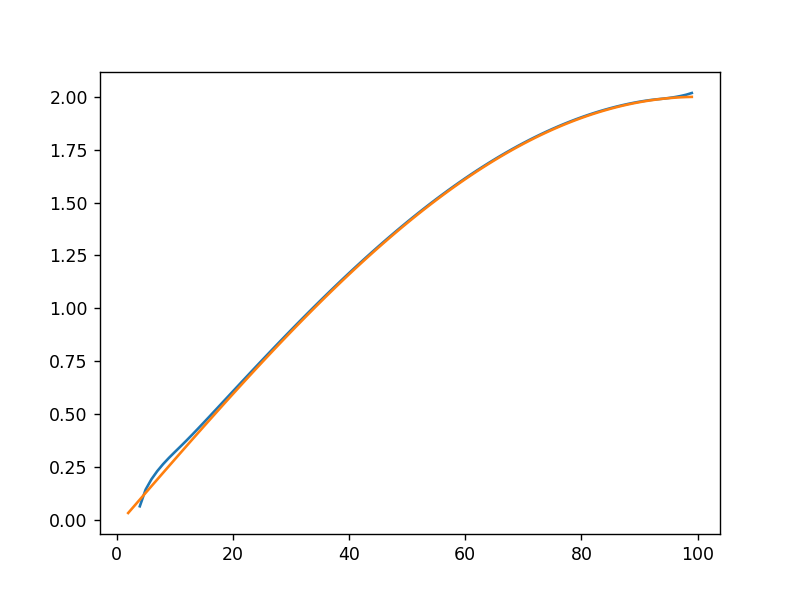

In [13]:
plt.plot(nes,np.sqrt(dots) )
plt.plot(nes,np.sqrt(dots1)) 

Здесь я строю для достатчно больших значений s, несмотря на заявленное малое отклонение. А всё потому, что s - размерный параметр. Это я, конечно, плохо сделал. Но ничего, для наших целей это не критично. Построим ещё для некоторых s:

In [14]:
dots3 = [ spectre(k , 500)[N] for N in range (k)]
dots4 = [ spectre(k , 1000)[N] for N in range (k)]
dots5 = [ spectre(k , 2000)[N] for N in range (k)]

<IPython.core.display.Javascript object>


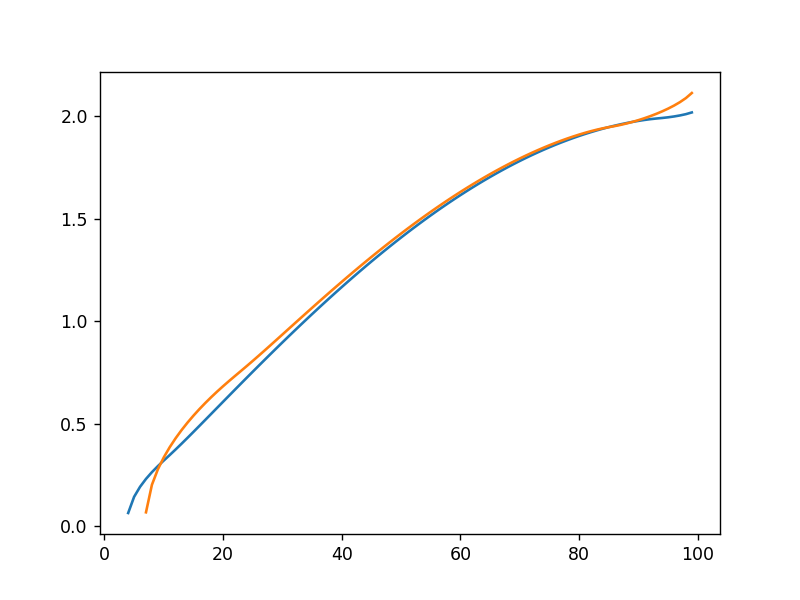

In [15]:
plt.plot(nes,np.sqrt(dots) )
plt.plot(nes,np.sqrt(dots3)) 

<IPython.core.display.Javascript object>


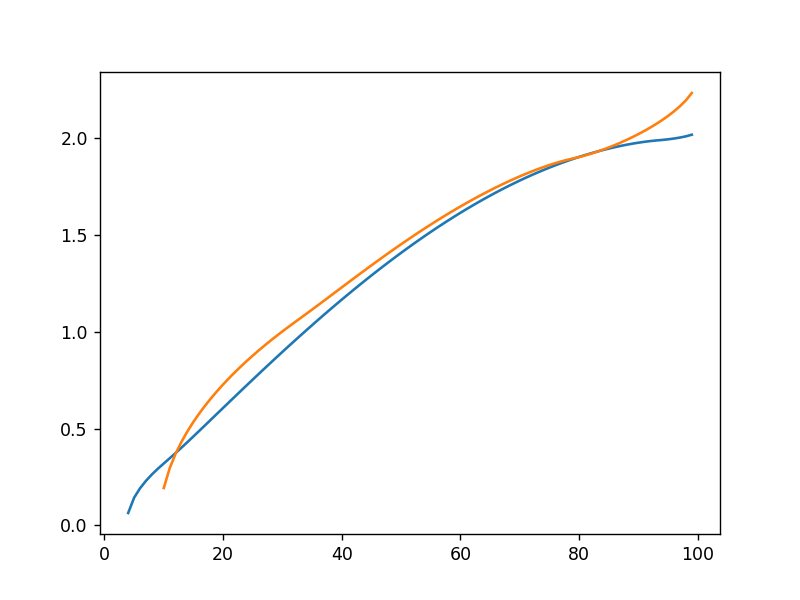

In [16]:
plt.plot(nes,np.sqrt(dots) )
plt.plot(nes,np.sqrt(dots4)) 

<IPython.core.display.Javascript object>


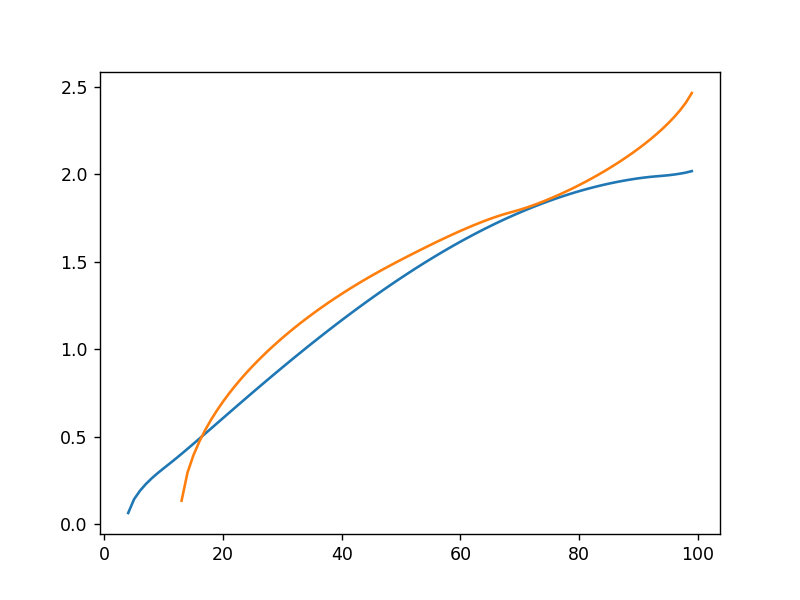

In [17]:
plt.plot(nes,np.sqrt(dots) )
plt.plot(nes,np.sqrt(dots5)) 

Как мы видим, распределение меняется достаточно весомо. 

In [12]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}